In [2]:
from scipy.integrate import ode
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import log

## Weight Gain

In [6]:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = 0.14 # Adaptive Thermogenesis
beta_TEF = 0.1 # Thermic Effect of Feeding
K = 0

In [7]:
def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)

def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2

def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F , p * EB / rho_L])

def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

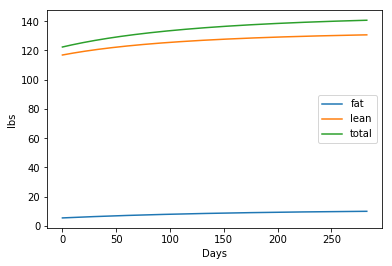

In [13]:
gender = 'male'
age = 25
height = 1.8288 # in meters
weight = 55.610425 # in kg
PAL = 1.7
days = 283
EI = 3000
F0 = fat_mass(weight, age, height, gender)
L0 = weight - F0
y0 = [F0, L0]
tf = days

t = np.linspace(0,tf,tf)
y = np.zeros((len(t), len(y0)))

y[0,:] = y0


weight_loss_ode = lambda t, y:weight_odesystem(t, y, EI, PAL)
w_l_solver = ode(weight_loss_ode).set_integrator('dopri5') 
w_l_solver.set_initial_value(y0, 0) 


for j in range(1, len(t)):
    y[j,:] = w_l_solver.integrate((t[j]))
    
np.save('weight_goal.npy',(y[:,0]+y[:,1])*2.2) # save the data

plt.plot(t, y[:,0]*2.2, label='fat')
plt.plot(t, y[:,1]*2.2, label='lean')
plt.plot(t, (y[:,0]+y[:,1])*2.2, label='total')
plt.legend()
plt.xlabel('Days')
plt.ylabel('lbs')
plt.show()
